###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./burn.rate.png)

Using Euler's method with a timestep of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  






## Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

###### The cell below loads the style of the notebook.

In [ ]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [11]:
from math import pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [12]:
# rocket parameters
m_s = 50.0
g = 9.81
p = 1.091
r = 0.5
A = pi*r**2
v_e = 325
C_D = 0.15
m_p0 = 100
# global m_p_dot
m_p_dot = 20

# initial conditions
h0 = 0
v0 = 0

In [13]:
def f(u):
            
    h = u[0]
    m_p = u[1]
    v = u[2]
    
    return numpy.array([v,
                        -m_p_dot,
                        -g + m_p_dot*v_e/(m_s + m_p) - p*v*abs(v)*A*C_D/(2*(m_s + m_p))])
    

In [14]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [15]:
T = 60
dt = 0.1
N = int(T/dt) + 1
t = numpy.linspace(0.0, T, N)

u = numpy.empty((N,3))
u[0] = numpy.array([h0, m_p0, v0])

for n in range(N-1):
    
    if n < 50:
        m_p_dot = 20    
    else:
        m_p_dot = 0
        m_p = 0
        u[n,1] = 0
        
    while u[n,0] < 0:
        u[n,0] = 0
        u[n,2] = 0
        m_p_dot = 0
    
    u[n+1] = euler_step(u[n], f, dt)

In [16]:
h = u[:,0] # the altitude
v = u[:,2] # the velocity

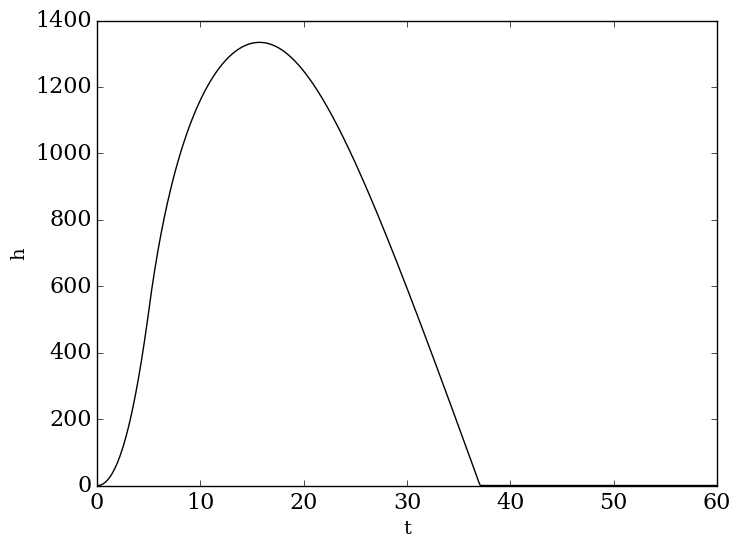

In [17]:
# plot the altitude w.r.t time
pyplot.figure(figsize = (8,6))
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('h',fontsize=14)
pyplot.title('Rocket altitude, flight time = %.2f' % T, fontsize = 18)
pyplot.plot(t,h, 'k-')

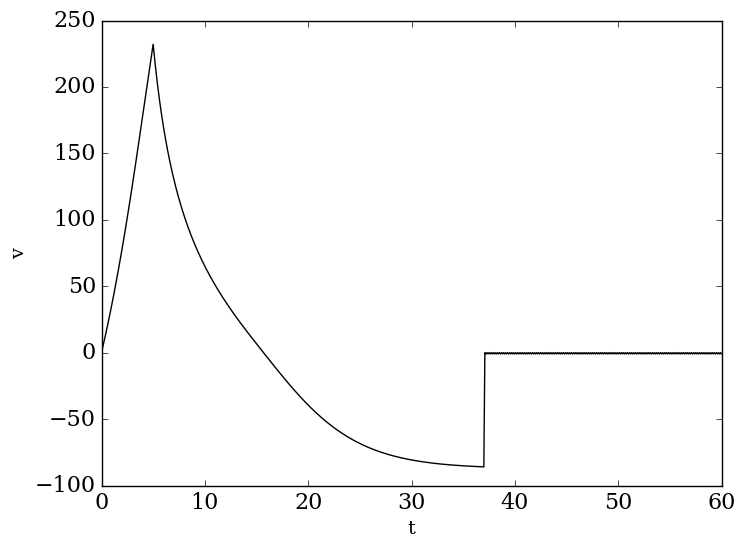

In [18]:
# plot the velocity w.r.t time
pyplot.figure(figsize = (8,6))
pyplot.xlabel('t',fontsize=14)
pyplot.ylabel('v',fontsize=14)
pyplot.title('Rocket velocity, flight time = %.2f' % T, fontsize = 18)
pyplot.plot(t,v, 'k-')